# Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#np.random.seed(0)
import os
import graphviz

In [2]:
########## Read all columns from a csv file ##########
df1 = pd.read_csv('flowersv1.csv', skipinitialspace=True, na_values=['NA', '.', '???'], skiprows=0, dtype={"email": str, "response": int}, chunksize=100000, iterator=True)
df = pd.concat(df1, ignore_index=True)
df.columns.str.replace("[ ]", "_")
df.rename(columns={'email':'ElectronicMail'}, inplace=True)
df.columns = df.columns.str.strip()
df = df.drop(['Customer_ID'], axis=1)
df.head() 
TargetLevels = np.array([0, 1])

In [3]:
df.head()

,response,Purchases_in_3month,Purchases_in_6month,Purchases_in_12month,ElectronicMail,internet- Purchases,phone-purchases,Promo var-1,Promo Var-2,promo_code,...,promo_code_12,total_discount_avail_12,avg_discount_avail_12,total_merchandise_amt_12,avg_merchandise_amt_12,TOTAL_ORDER_AMT_12,avg_TOTAL_ORDER_AMT_12,number_times_shipped_12,total_quantity_ordered_12,Time_since_last_purchase
0,0,0,0,3,0,4,0,2,2,1,...,1,4.5,1.5,84.97,28.323333,134.60,44.866667,2,3,9
1,0,0,0,1,0,3,0,3,0,2,...,0,0.0,0.0,49.99,49.990000,64.98,64.980000,0,1,7
2,0,0,1,2,0,2,0,0,2,0,...,0,0.0,0.0,114.98,57.490000,142.96,71.480000,2,2,4
3,0,0,2,2,0,3,0,1,2,0,...,0,0.0,0.0,74.98,37.490000,107.32,53.660000,1,2,3
4,0,0,0,1,0,1,0,0,1,1,...,1,0.0,0.0,29.99,29.990000,42.98,42.980000,1,1,6


In [4]:
list(df)

['response',
 'Purchases_in_3month',
 'Purchases_in_6month',
 'Purchases_in_12month',
 'ElectronicMail',
 'internet- Purchases',
 'phone-purchases',
 'Promo var-1',
 'Promo Var-2',
 'promo_code',
 'total_discount_avail',
 'avg_discount_avail',
 'total_merchandise_amt',
 'avg_merchandise_amt',
 'TOTAL_ORDER_AMT',
 'avg_TOTAL_ORDER_AMT',
 'number_times_shipped',
 'total_quantity_ordered',
 'last_order_date',
 'promo_code_3',
 'total_discount_avail_3',
 'avg_discount_avail_3',
 'total_merchandise_amt_3',
 'avg_merchandise_amt_3',
 'TOTAL_ORDER_AMT_3',
 'avg_TOTAL_ORDER_AMT_3',
 'number_times_shipped_3',
 'total_quantity_ordered_3',
 'promo_code_6',
 'total_discount_avail_6',
 'avg_discount_avail_6',
 'total_merchandise_amt_6',
 'avg_merchandise_amt_6',
 'TOTAL_ORDER_AMT_6',
 'avg_TOTAL_ORDER_AMT_6',
 'number_times_shipped_6',
 'total_quantity_ordered_6',
 'promo_code_12',
 'total_discount_avail_12',
 'avg_discount_avail_12',
 'total_merchandise_amt_12',
 'avg_merchandise_amt_12',
 'TOTAL_

In [5]:
########## Check distinct values in all columns ##########
for col in df:
    print (df[col].unique())
########## Drop columns which have onle one distinct value ##########
df = df[[c for c in list(df) if len(df[c].unique()) > 1]]
#df.drop(df.columns[[0, 1, 3]], axis=1)  #df.columns is zero-based pd.Index
print (df.dtypes)	

[0 1]
[ 0  1  2  4  3  6  9  8  5 10  7 11 15 80 12 17 16 39 21 14 22 13 19 26
 23 18 50 52 29 33 20 27 30 38 36 25]
[  0   1   2   4   5   3   6   7   9   8  13  16  10  12  11  17  14  25
  20  22  15  21  80  18  19  28  39  26  40  24  27  23  37  35  34  58
 116  59  30  66  29  89  31  88  44  32  57  49]
[  3   1   2   4   6   0  11   5   7   8  10   9  14  12  13  25  20  30
  23  16  19  17  15  18  27  22  24  65  38  26  21  34  31  42  51  33
  92  36  29  45  28  32  43  47  39  82  35  44  41  62  68  61  40  37
  48  58  54 245  57  90  49  55 117  89 108  83  46  77]
['0']
[  4   3   2   1   0  10   6  13  12   5  11   7   9   8  18  20  15  28
  16  14  27  52  17  40  33  21  19  22  36  24  26  25  23  31  38  42
  32  91  44  41  39  37  34  43  46  30  50  35  48  29  62  55  59  69
  49  72  57  74  53  77  45  56  63 145 108  96  47  58  51 121  54  66
 227 261  61  89  65  83  60  73  76 104  95  99  98 496  68 201  88 183
 164 148 100  70 119]
[ 0  1  2  3  5  

In [6]:
########## Change column data types as needed ##########
print (df.dtypes)
df['response']= df['response'].astype(str)
print (df.dtypes)


response                       int32
Purchases_in_3month            int64
Purchases_in_6month            int64
Purchases_in_12month           int64
internet- Purchases            int64
phone-purchases                int64
Promo var-1                    int64
Promo Var-2                    int64
promo_code                     int64
total_discount_avail         float64
avg_discount_avail           float64
total_merchandise_amt        float64
avg_merchandise_amt          float64
TOTAL_ORDER_AMT              float64
avg_TOTAL_ORDER_AMT          float64
number_times_shipped           int64
total_quantity_ordered         int64
promo_code_3                   int64
total_discount_avail_3       float64
avg_discount_avail_3         float64
total_merchandise_amt_3      float64
avg_merchandise_amt_3        float64
TOTAL_ORDER_AMT_3            float64
avg_TOTAL_ORDER_AMT_3        float64
number_times_shipped_3         int64
total_quantity_ordered_3       int64
promo_code_6                   int64
t

In [7]:
########## Create features and label variables ##########
X = df.drop('response', axis=1)
Y = df.loc[:, 'response']

In [8]:
########## split data into training and testing set ##########
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25)
y_train = pd.DataFrame(y_train)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
features = train.columns[:44]

y_train.columns = ['response']
y_test.columns = ['response']
# print(X)
# print(Y)

In [9]:
test.head()

,Purchases_in_3month,Purchases_in_6month,Purchases_in_12month,internet- Purchases,phone-purchases,Promo var-1,Promo Var-2,promo_code,total_discount_avail,avg_discount_avail,...,total_discount_avail_12,avg_discount_avail_12,total_merchandise_amt_12,avg_merchandise_amt_12,TOTAL_ORDER_AMT_12,avg_TOTAL_ORDER_AMT_12,number_times_shipped_12,total_quantity_ordered_12,Time_since_last_purchase,response
239119,3,3,10,15,0,8,7,6,69.0,4.6,...,41.25,4.125,599.90,59.99,704.70,70.47,4,10,0,0
189914,0,0,1,1,0,1,0,1,6.0,6.0,...,6.00,6.000,39.99,39.99,48.98,48.98,0,1,11,0
503027,0,0,3,3,0,1,2,3,0.0,0.0,...,0.00,0.000,134.97,44.99,181.53,60.51,2,3,6,0
150491,0,0,0,0,1,1,0,0,0.0,0.0,...,0.00,0.000,0.00,0.00,0.00,0.00,0,0,12,0
298855,0,0,2,2,0,2,0,2,20.0,10.0,...,20.00,10.000,109.98,54.99,122.96,61.48,0,2,6,0


In [11]:
########## Random forest classifier ##########
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([[0.6       , 0.4       ],
       [0.89349677, 0.10650323],
       [0.96      , 0.04      ],
       [1.        , 0.        ],
       [0.975     , 0.025     ],
       [0.94      , 0.06      ],
       [1.        , 0.        ],
       [0.74      , 0.26      ],
       [0.82403608, 0.17596392],
       [0.97359123, 0.02640877]])

In [12]:
# View features list and their importance scores
list(zip(train[features], clf.feature_importances_))

[('Purchases_in_3month', 0.0031821337786002357),
 ('Purchases_in_6month', 0.004445242566100382),
 ('Purchases_in_12month', 0.010976076138019758),
 ('internet- Purchases', 0.022209654526467396),
 ('phone-purchases', 0.013922110926128838),
 ('Promo var-1', 0.018651715160293885),
 ('Promo Var-2', 0.014394256349849678),
 ('promo_code', 0.014589673706576687),
 ('total_discount_avail', 0.029171300730423035),
 ('avg_discount_avail', 0.02976309405640509),
 ('total_merchandise_amt', 0.0546999218067813),
 ('avg_merchandise_amt', 0.054158148025890626),
 ('TOTAL_ORDER_AMT', 0.09805352632111879),
 ('avg_TOTAL_ORDER_AMT', 0.09818188280043257),
 ('number_times_shipped', 0.014594275247748438),
 ('total_quantity_ordered', 0.015162395623346488),
 ('promo_code_3', 0.0013335207995894976),
 ('total_discount_avail_3', 0.0029243065125559554),
 ('avg_discount_avail_3', 0.0030755542437473043),
 ('total_merchandise_amt_3', 0.008506937269100507),
 ('avg_merchandise_amt_3', 0.008173179318736205),
 ('TOTAL_ORDER_A

Purchases_in_3month 0.0031821337786002357
Purchases_in_6month 0.004445242566100382
Purchases_in_12month 0.010976076138019758
internet- Purchases 0.022209654526467396
phone-purchases 0.013922110926128838
Promo var-1 0.018651715160293885
Promo Var-2 0.014394256349849678
promo_code 0.014589673706576687
total_discount_avail 0.029171300730423035
avg_discount_avail 0.02976309405640509
total_merchandise_amt 0.0546999218067813
avg_merchandise_amt 0.054158148025890626
TOTAL_ORDER_AMT 0.09805352632111879
avg_TOTAL_ORDER_AMT 0.09818188280043257
number_times_shipped 0.014594275247748438
total_quantity_ordered 0.015162395623346488
promo_code_3 0.0013335207995894976
total_discount_avail_3 0.0029243065125559554
avg_discount_avail_3 0.0030755542437473043
total_merchandise_amt_3 0.008506937269100507
avg_merchandise_amt_3 0.008173179318736205
TOTAL_ORDER_AMT_3 0.014117977820888184
avg_TOTAL_ORDER_AMT_3 0.014700436136052302
number_times_shipped_3 0.0019899775997092887
total_quantity_ordered_3 0.003195951

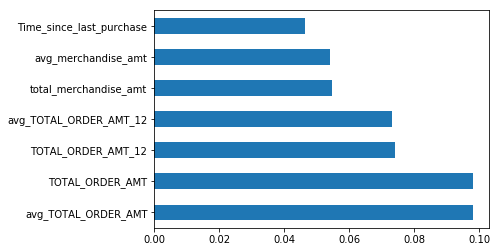

In [17]:
#another way to get feature importance
for name, importance in zip(X_train.columns, clf.feature_importances_):
    print(name, importance)
feat_importances = pd.Series(clf.feature_importances_, index=features)
feat_importances.nlargest(7).plot(kind='barh')


In [14]:
#Accuracy
print ("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print ("Confusion matrix ", confusion_matrix(y_test, predictions))

Train Accuracy ::  0.9869219349783273
Test Accuracy  ::  0.9136314943760043
Confusion matrix  [[183930   1137]
 [ 16278    291]]


In [15]:
#tree1 = clf.estimators_[5]

#from sklearn import tree
#from sklearn.externals.six import StringIO  
#import pydot 

#dot_data = StringIO() 
#tree.export_graphviz(tree1, out_file=dot_data) 
#graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

#graph[0].write_pdf("RFonetree.pdf")  # must access graph's first element
